In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import glob
from scipy import stats
import re

# %matplotlib widget 
%matplotlib inline

dir_setup = '/p/scratch/cjibg36/kaandorp2/TSMP/tsmp_cordex_test'
pffiles = glob.glob(os.path.join(dir_setup,'input/parflow/*.sa'))


In [2]:
pffiles

['/p/scratch/cjibg36/kaandorp2/TSMP/tsmp_cordex_test/input/parflow/slopey.sa',
 '/p/scratch/cjibg36/kaandorp2/TSMP/tsmp_cordex_test/input/parflow/slopex.sa',
 '/p/scratch/cjibg36/kaandorp2/TSMP/tsmp_cordex_test/input/parflow/parflow_436x424x15_cosmomask_indicator_FAOonly.sa']

In [3]:
def read_pffile(file):
    with open(file) as f:
        nx, ny, nz = [int(x) for x in next(f).split()] # read first line

        array = []
        for i1,line in enumerate(f): # read rest of lines
            array.append(float(line))

    data = np.array(array).reshape([nz,ny,nx])    
    return data

slopex = read_pffile( glob.glob(os.path.join(dir_setup,'input/parflow/*slopex.sa'))[0] )
slopey = read_pffile( glob.glob(os.path.join(dir_setup,'input/parflow/*slopey.sa'))[0] )
mask = read_pffile( glob.glob(os.path.join(dir_setup,'input/parflow/*FAOonly.sa'))[0] )



[ 1.  2.  3.  4.  6.  7.  9. 11. 12. 13. 14. 15. 16.]
[  78660   32625  276990   34575  798930   65850  148455     165   29895
    2100 1288530   12360    3825]
[14.]


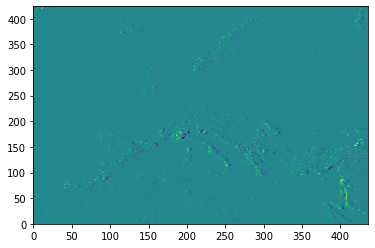

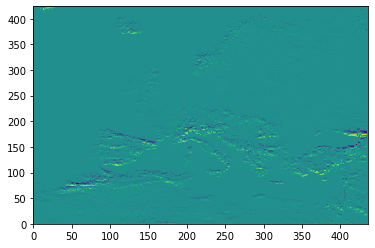

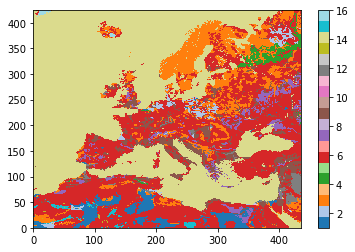

In [4]:
plt.figure()
plt.pcolormesh(slopex[0,:,:])


plt.figure()
plt.pcolormesh(slopey[0,:,:])


plt.figure()
plt.pcolormesh(mask[0,:,:],cmap=plt.cm.tab20)
plt.colorbar()

vals,counts = np.unique(mask,return_counts=True)
print(vals)
print(counts)

print(vals[counts == max(counts)])

/tmp/ipykernel_28578/29635338.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


array([  78660,   32625,  276990,   34575,  798930,   65850,  148455,
           165,   29895,    2100, 1288530,   12360,    3825])

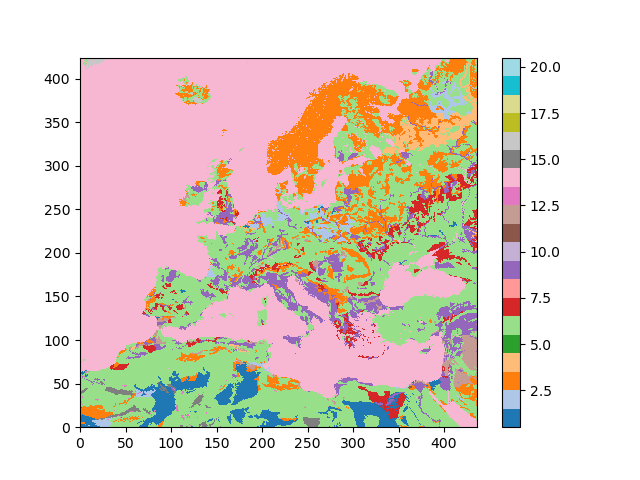

In [23]:
plt.figure()
plt.pcolormesh(mask[-1,:,:],cmap=plt.cm.tab20,vmin=0.5,vmax=20.5)
cbar = plt.colorbar()
counts 

# np.unique(
# cbar.set_ticklabels(np.unique(mask))

In [5]:
solfile = '/p/scratch/cjibg36/kaandorp2/TSMP/tsmp_cordex_109x106/input_pf/geom_cordex0.11_436x424.pfsol'

#points, last line: 795162

with open(solfile) as f:
    next(f)
    n_points = int(next(f))
    
    i_start = 0
#     for i1,line in enumerate(f):
#         x,y,z= [int(x) for x in next(f).split()]
        
    array = []
    for i1,line in enumerate(f): # read rest of lines
        
        # next(f)

        if i1 == i_start + n_points:
            break

        array.append([float(x) for x in line.split()])

        
array = np.array(array,dtype=int)

In [53]:
array[1:,0] - array[:-1,0]

array([6250, 6250, 6250, ..., 6250, 6250, 6250])

In [7]:
3194250-3192750

1500

In [40]:
int(n_points)


795160

In [57]:
397580*2

795160

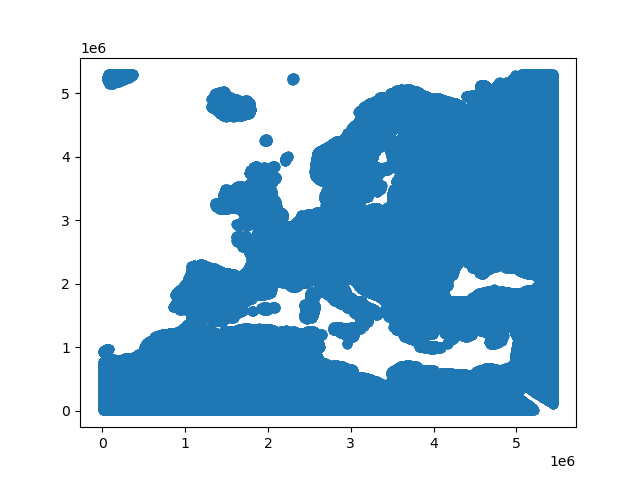

In [6]:
%matplotlib widget
plt.figure()
plt.plot(array[:,0],array[:,1],'o')

In [7]:
1.07**10

1.9671513572895665